In [12]:
from helpers import *
from heapq import heappush,heappop,heapify
import random
from tests import case1,case2,case3,case4
import time
import matplotlib.pyplot as plt
%matplotlib inline

Implementăm algoritmul A*. Pentru starea curentă, selectăm din cele 6 stări vecine, cea care ne dă valoarea funcției f cea mai mică

In [64]:
def a_star(given_moves:str,heuristic):
    priority_queue=[]
    initial_cube=Cube(given_moves)
    initial_state=initial_cube.state
    goal_state=initial_cube.goal_state
    heappush(priority_queue,(heuristic(initial_state,initial_cube.goal_state),tuple(initial_state)))
    dictionary_g_function={}
    dictionary_g_function={tuple(initial_state) : 0}
    total_number_of_discovered_states=0
    parents={}
    parents[tuple(initial_state)]=None
    discovered_states={}
    in_priority_queue={tuple(initial_state):None}
    while priority_queue!=[]:
        (f_value,current_state)=heappop(priority_queue)
        total_number_of_discovered_states += 1
        if(list(current_state)==initial_cube.goal_state.tolist()):
            return total_number_of_discovered_states,f_value
        current_state_array=np.array(current_state)
        current_g_value=dictionary_g_function[current_state]
        current_state_tuple=tuple(current_state_array)
        discovered_states[current_state_tuple]=True
        in_priority_queue.pop(current_state_tuple)
        for move_number in range(6):
            neigh_state=Cube.move_state(current_state_array,move_number)
            neigh_state_tuple=tuple(neigh_state)
            if(parents[current_state_tuple]==neigh_state_tuple):
                continue
            h_value=heuristic(neigh_state,goal_state)
            new_g_value=current_g_value+1
            f=new_g_value+h_value
            if(neigh_state_tuple not in dictionary_g_function):
                dictionary_g_function[neigh_state_tuple]=new_g_value
                parents[neigh_state_tuple]=current_state_tuple
                heappush(priority_queue,(f,neigh_state_tuple))
                in_priority_queue[neigh_state_tuple]=None
            else:
                if(new_g_value < dictionary_g_function[neigh_state_tuple]):
                    if(neigh_state_tuple in in_priority_queue):
                        old_g= dictionary_g_function[neigh_state_tuple]
                        index_current_neigh_state=priority_queue.index((old_g+h_value,
                                                                        neigh_state_tuple))
                        priority_queue[index_current_neigh_state] = (f,neigh_state_tuple)
                        heapify(priority_queue)
                    else:
                        heappush(priority_queue,(f,neigh_state_tuple))
                        in_priority_queue[neigh_state_tuple]=None
                        parents[neigh_state_tuple]=current_state_tuple
                    dictionary_g_function[neigh_state_tuple] = new_g_value

In [3]:
def bidirectional_bfs(given_moves:str):
    initial_cube=Cube(given_moves)
    queue=Queue()
    queue.put((initial_cube.state,"Start",0))
    queue.put((initial_cube.goal_state,"End",0))
    discovered_states={}
    parents={tuple(initial_cube.state):None,tuple(initial_cube.goal_state):None}
    found_common_point=False
    total_number_of_discovered_states=0
    while(queue.empty()==False):
        current_state,direction,distance=queue.get()
        current_state_tuple=tuple(current_state)
        discovered_states[current_state_tuple]=(direction,distance)
        total_number_of_discovered_states += 1
        for move_number in range(6):
            neigh_state=Cube.move_state(current_state,move_number)
            neigh_state_tuple=tuple(neigh_state)
            if(parents[current_state_tuple]==neigh_state_tuple):
                continue
            if(neigh_state_tuple not in discovered_states):
                queue.put((neigh_state,direction,distance+1))
                parents[neigh_state_tuple]=current_state_tuple
            else:
                current_dictionary_direction,given_distance=discovered_states[neigh_state_tuple]
                if(direction!=current_dictionary_direction):
                    return total_number_of_discovered_states,given_distance+distance+1
                else:
                    continue

In [65]:
def metrics_two_algorithms(case:str):
    start_time_a_star=time.time()
    states_a_star,cost_a_star=a_star(case,h1)
    end_time_a_star=time.time()
    time_a_star=end_time_a_star-start_time_a_star
    start_time_bidirectional_bfs=time.time()
    states_bfs,cost_bfs=bidirectional_bfs(case)
    end_time_bidirectional_bfs=time.time()
    time_bfs=end_time_bidirectional_bfs-start_time_bidirectional_bfs
    return [time_a_star,states_a_star,cost_a_star],[time_bfs,states_bfs,cost_bfs]

In [66]:
times_a_star,times_bidir_bfs=[],[]
states_a_star,states_bidir_bfs=[],[]
solution_length_a_star,solution_length_bidir_bfs=[],[]
for case in [case1,case2,case3,case4]:
    a_star_results,bidir_bfs_results=metrics_two_algorithms(case)
    times_a_star.append(a_star_results[0]*1000)
    times_bidir_bfs.append(bidir_bfs_results[0]*1000)
    states_a_star.append(a_star_results[1])
    states_bidir_bfs.append(bidir_bfs_results[1])
    solution_length_a_star.append(a_star_results[2])
    solution_length_bidir_bfs.append(bidir_bfs_results[2])

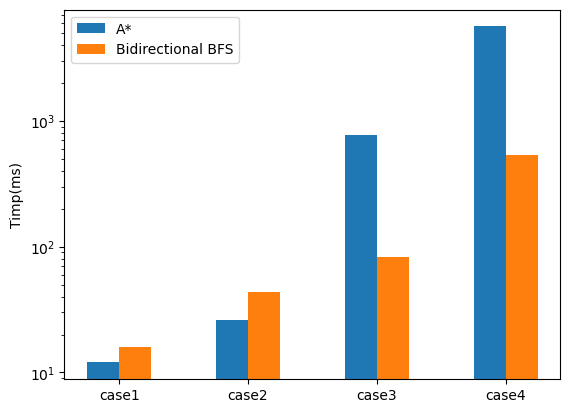

In [67]:
fig,ax=plt.subplots()
ax.bar(np.arange(4),np.array(times_a_star),label="A*",width=0.25)
ax.bar(np.arange(4)+0.25,np.array(times_bidir_bfs),label="Bidirectional BFS",width=0.25)
ax.set_xticks(np.arange(4)+0.125,np.array(["case1","case2","case3","case4"]))
ax.set_ylabel("Timp(ms)")
ax.legend()
plt.yscale('log')
plt.show()

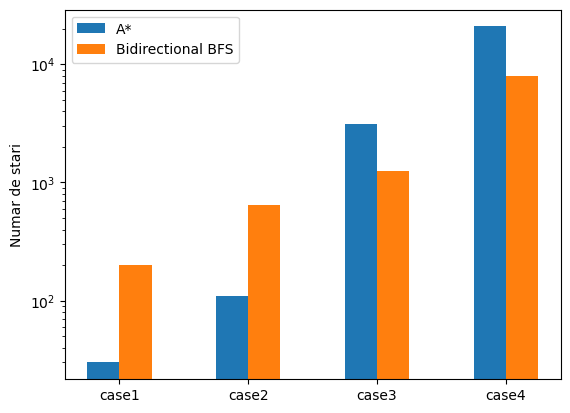

In [68]:
fig,ax=plt.subplots()
ax.bar(np.arange(4),np.array(states_a_star),label="A*",width=0.25)
ax.bar(np.arange(4)+0.25,np.array(states_bidir_bfs),label="Bidirectional BFS",width=0.25)
ax.set_xticks(np.arange(4)+0.125,np.array(["case1","case2","case3","case4"]))
ax.set_ylabel("Numar de stari")
ax.legend()
plt.yscale('log')
plt.show()

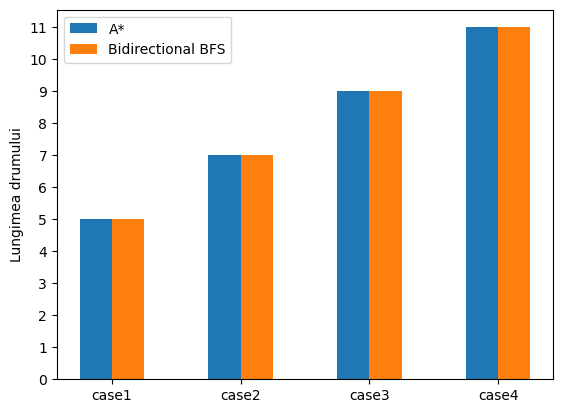

In [73]:
fig,ax=plt.subplots()
ax.bar(np.arange(4),np.array(solution_length_a_star),label="A*",width=0.25)
ax.bar(np.arange(4)+0.25,np.array(solution_length_bidir_bfs),label="Bidirectional BFS",width=0.25)
ax.set_xticks(np.arange(4)+0.125,np.array(["case1","case2","case3","case4"]))
ax.set_ylabel("Lungimea drumului")
ax.set_yticks(np.arange(12))
ax.legend()
plt.show()

In [82]:
"""
Avem de rezolvat ecuatia (b*)^(d+1)-1=(b*-1)*(N+1)

"""
def newton_raphson(path_length,number_of_states):
    x_0=6
    while True:
        x=x_0-(x_0**(path_length+1)-1-number_of_states*(x_0-1))/((path_length+1)*(x_0**path_length)-number_of_states)
        if(abs(x-x_0)<1e-5):
            return x
        x_0=x
newton_raphson(solution_length_a_star[3],states_a_star[3])

2.3487772201853883

In [90]:
states_a_star[0],solution_length_a_star[0],times_a_star[0]

(30, 5.0, 11.989831924438477)

In [91]:
states_a_star[1],solution_length_a_star[1],times_a_star[1]

(109, 7.0, 26.035547256469727)

In [92]:
states_a_star[2],solution_length_a_star[2],times_a_star[2]

(3145, 9.0, 768.9988613128662)

In [93]:
states_a_star[3],solution_length_a_star[3],times_a_star[3]

(20900, 11.0, 5645.99871635437)